## ML models to predict the ‘Insurance cost’ with minimum MSE and RMSE and maximum R-Square score

## MULTIPLE LINEAR REGRESSOR

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
dataset = pd.read_csv('insurance.csv')
print(dataset)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


### EDA

In [3]:
dataset.shape 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### DATA PREPROCESSING

In [4]:
#extracting x and y columns from the dataset
x=dataset.iloc[ : , :-1].values
y=dataset.iloc[ : ,-1].values

In [5]:
print(x)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


In [6]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


### Encoding the categorical data

In [7]:
dataset["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
dataset["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
dataset["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [10]:
#for encoding the categorical column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])], remainder = 'passthrough')
x=ct.fit_transform(x)
print(x)

[[1.0 0.0 0.0 ... 19 27.9 0]
 [0.0 1.0 1.0 ... 18 33.77 1]
 [0.0 1.0 1.0 ... 28 33.0 3]
 ...
 [1.0 0.0 1.0 ... 18 36.85 0]
 [1.0 0.0 1.0 ... 21 25.8 0]
 [1.0 0.0 0.0 ... 61 29.07 0]]


In [11]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2, random_state=0)

### Importing and Training the Model

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_tr,y_tr)

LinearRegression()

In [13]:
#to predict the values of output 
y_pred = regressor.predict(x_te)

In [14]:
#calculate and print the errors (MSE and RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(y_te, y_pred)
mse=mean_squared_error(y_te, y_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

3893.7494207052237
31757659.401992697
5635.393455828324


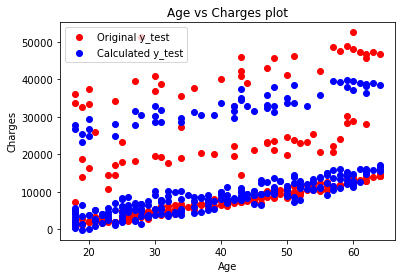

In [15]:
#visualizing the output pair-plot for 'Age' and 'Charges'
plt.scatter(x_te[:,8],y_te,c='red',label = 'Original y_test')
plt.scatter(x_te[:,8],y_pred,c='blue',label = 'Calculated y_test')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges plot')
plt.legend()
plt.show()

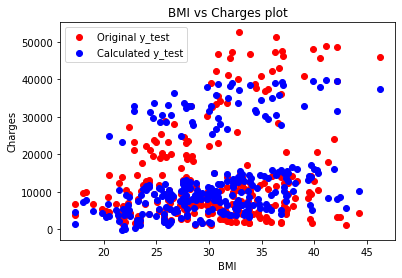

In [28]:
#visualizing the output pair-plot for 'BMI' and 'Charges'
plt.scatter(x_te[:,9],y_te,c='red',label = 'Original y_test')
plt.scatter(x_te[:,9],y_pred,c='blue',label = 'Calculated y_test')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges plot')
plt.legend()
plt.show()

## Backward Elimination

### Performing Backward Elimination Manually

In [16]:
#preparing our data for Backward Elimination now
#removing one dummy variable and adding the constant column
x_temp=x[ : ,1 : ]
print(x_temp)

[[0.0 0.0 1.0 ... 19 27.9 0]
 [1.0 1.0 0.0 ... 18 33.77 1]
 [1.0 1.0 0.0 ... 28 33.0 3]
 ...
 [0.0 1.0 0.0 ... 18 36.85 0]
 [0.0 1.0 0.0 ... 21 25.8 0]
 [0.0 0.0 1.0 ... 61 29.07 0]]


In [17]:
#adding a constant column
const = np.ones((1338,1))
#np.append takes three values
x_temp = np.append(arr = const, values = x_temp, axis=1)
print(x_temp)

[[1.0 0.0 0.0 ... 19 27.9 0]
 [1.0 1.0 1.0 ... 18 33.77 1]
 [1.0 1.0 1.0 ... 28 33.0 3]
 ...
 [1.0 0.0 1.0 ... 18 36.85 0]
 [1.0 0.0 1.0 ... 21 25.8 0]
 [1.0 0.0 0.0 ... 61 29.07 0]]


In [18]:
x_opt = np.array(x_temp[ : , [0,1,2,3,4,5,6]], dtype=float)

In [19]:
import statsmodels.api as sm
stats = sm.OLS(endog = y, exog = x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     361.2
Date:                Sun, 18 Oct 2020   Prob (F-statistic):          4.58e-275
Time:                        16:40:23   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.768e+04
Df Residuals:                    1331   BIC:                         2.771e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.234e+16    3.1e+16     -2.010      0.0

In [20]:
x_opt = np.array(x_temp[ : , [0,1,2,3,4,6]], dtype=float)  #removing column with index number 5
stats = sm.OLS(endog = y, exog=x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     432.7
Date:                Sun, 18 Oct 2020   Prob (F-statistic):          5.43e-276
Time:                        16:40:23   Log-Likelihood:                -13832.
No. Observations:                1338   AIC:                         2.768e+04
Df Residuals:                    1332   BIC:                         2.771e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.58e+16   3.23e+16     -1.727      0.0

In [21]:
x_opt = np.array(x_temp[ : , [0,2,3,4,6]], dtype=float)  #removing column with index number 1
stats = sm.OLS(endog = y, exog=x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     543.9
Date:                Sun, 18 Oct 2020   Prob (F-statistic):          3.09e-278
Time:                        16:40:24   Log-Likelihood:                -13830.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1333   BIC:                         2.770e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.593e+16    2.6e+16     -0.996      0.3

In [22]:
x_opt = np.array(x_temp[ : , [0,2,4,6]], dtype=float)   #removing column with index number 3
stats = sm.OLS(endog = y, exog=x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     726.5
Date:                Sun, 18 Oct 2020   Prob (F-statistic):          6.94e-280
Time:                        16:40:24   Log-Likelihood:                -13830.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1334   BIC:                         2.769e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.174e+04    509.588     62.288      0.0

In [23]:
x_opt = np.array(x_temp[ : , [0,4,6]], dtype=float)   #removing column with index number 2
stats = sm.OLS(endog = y, exog=x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.455
Date:                Sun, 18 Oct 2020   Prob (F-statistic):             0.0118
Time:                        16:40:24   Log-Likelihood:                -14473.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1335   BIC:                         2.897e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.238e+04    473.771     26.136      0.0

In [24]:
x_opt = np.array(x_temp[ : , [0,6]], dtype=float)   #removing column with index number 4
stats = sm.OLS(endog = y, exog=x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     7.353
Date:                Sun, 18 Oct 2020   Prob (F-statistic):            0.00678
Time:                        16:40:24   Log-Likelihood:                -14474.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1336   BIC:                         2.896e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.272e+04    387.111     32.866      0.0

In [25]:
# Now again splitting and training the model after performing backward elimination
x_train,x_test,y_train,y_test = train_test_split(x_opt,y,test_size = 0.2,random_state=0)
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [26]:
# predicting the output and printing the errors
y_pr = reg.predict(x_test)
print(mean_absolute_error(y_test,y_pr))
print(mean_squared_error(y_test,y_pr))

9362.547296936635
159258942.36755106
